<a href="https://colab.research.google.com/github/suhas-arun/Neural-Networks/blob/master/MNISTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers
import time

In [0]:
(train_images, _), *_ = tf.keras.datasets.mnist.load_data()

In [0]:
BATCH_SIZE = 256
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(BATCH_SIZE)

In [0]:
def create_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])

    return model

In [0]:
def create_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])

    return model

In [0]:
generator = create_generator()
discriminator = create_discriminator()

In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimiser = tf.keras.optimizers.Adam(1e-4)
discriminator_optimiser = tf.keras.optimizers.Adam(1e-4)

In [0]:
EPOCHS = 100
noise_dim = 100
num_images = 16

input_noise = tf.random.normal([num_images, noise_dim])

In [0]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimiser.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimiser.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    generate_images(generator, input_noise)

    print(f"Time for epoch {epoch + 1}: {time.time() - start}s")

In [0]:
def generate_images(model, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.show()

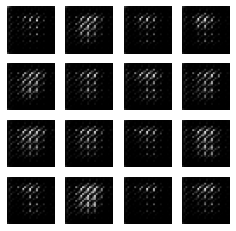

Time for epoch 1: 14.385453939437866s


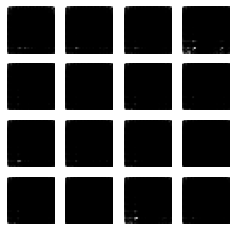

Time for epoch 2: 6.215865135192871s


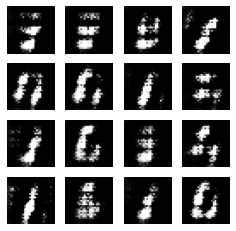

Time for epoch 3: 6.275885820388794s


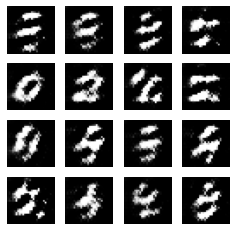

Time for epoch 4: 6.15550684928894s


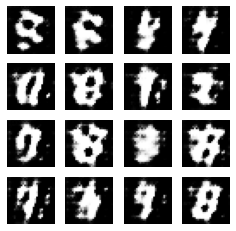

Time for epoch 5: 6.296866416931152s


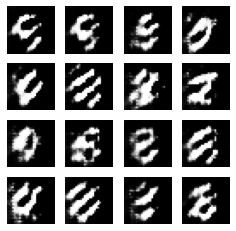

Time for epoch 6: 6.175288677215576s


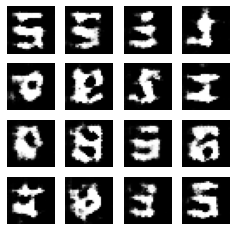

Time for epoch 7: 6.158298015594482s


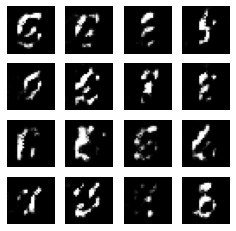

Time for epoch 8: 6.293823480606079s


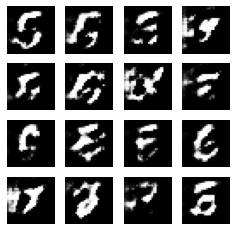

Time for epoch 9: 6.137890815734863s


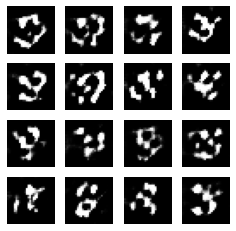

Time for epoch 10: 6.138057231903076s


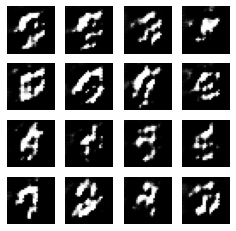

Time for epoch 11: 6.280912637710571s


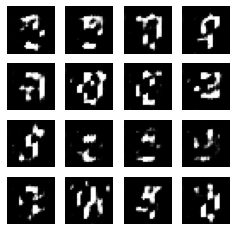

Time for epoch 12: 6.157615423202515s


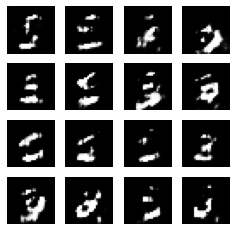

Time for epoch 13: 6.158526182174683s


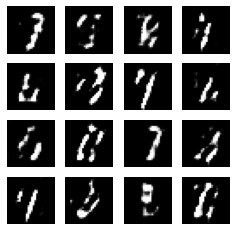

Time for epoch 14: 6.296706676483154s


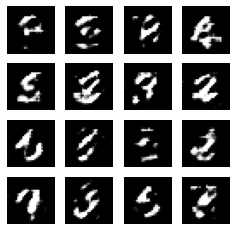

Time for epoch 15: 6.148011207580566s


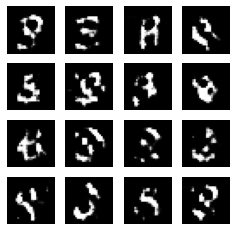

Time for epoch 16: 6.172304153442383s


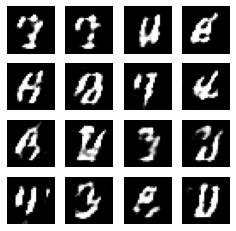

Time for epoch 17: 6.295229434967041s


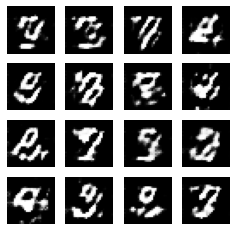

Time for epoch 18: 6.1476757526397705s


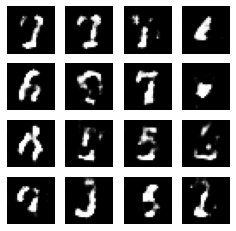

Time for epoch 19: 6.1558966636657715s


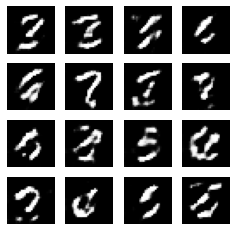

Time for epoch 20: 6.289972543716431s


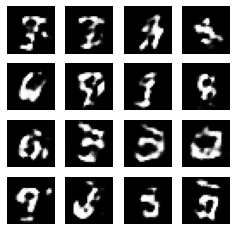

Time for epoch 21: 6.1607887744903564s


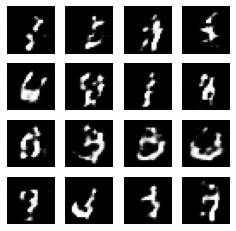

Time for epoch 22: 6.159082889556885s


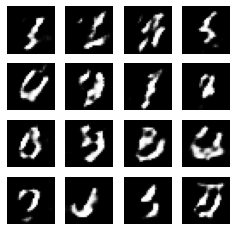

Time for epoch 23: 6.279334545135498s


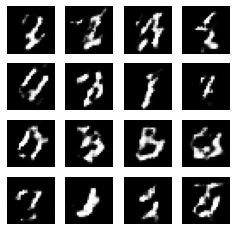

Time for epoch 24: 6.145951509475708s


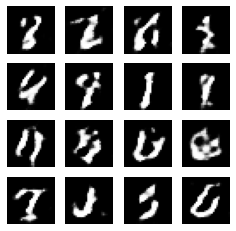

Time for epoch 25: 6.128527402877808s


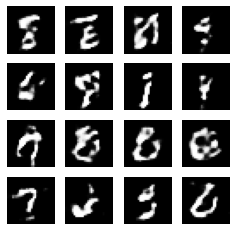

Time for epoch 26: 6.3052825927734375s


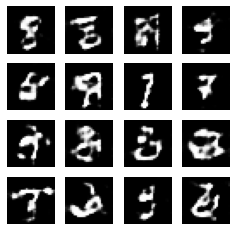

Time for epoch 27: 6.157475709915161s


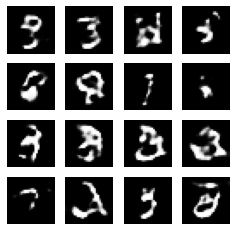

Time for epoch 28: 6.156868934631348s


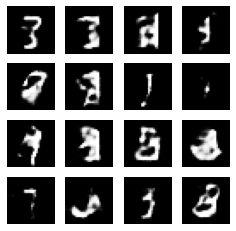

Time for epoch 29: 6.285890340805054s


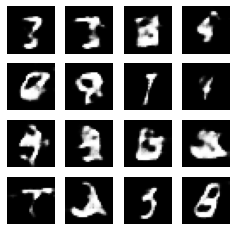

Time for epoch 30: 6.136811971664429s


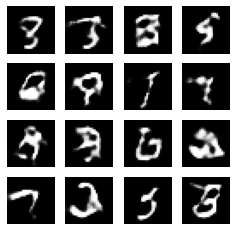

Time for epoch 31: 6.146579027175903s


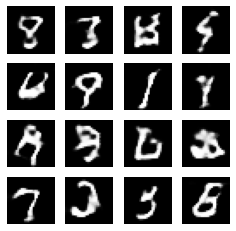

Time for epoch 32: 6.289458751678467s


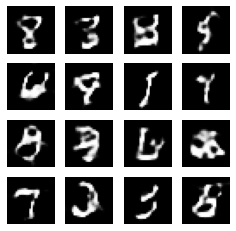

Time for epoch 33: 6.156642436981201s


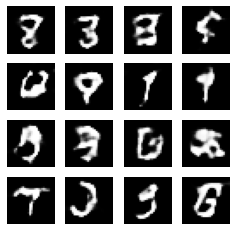

Time for epoch 34: 6.155752897262573s


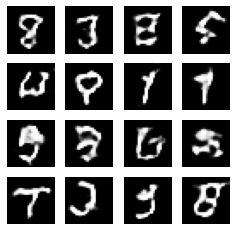

Time for epoch 35: 6.281033277511597s


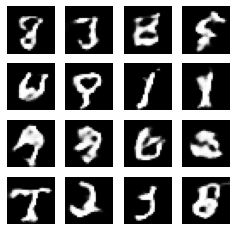

Time for epoch 36: 6.132486343383789s


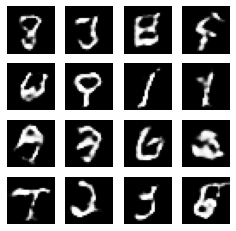

Time for epoch 37: 6.1504247188568115s


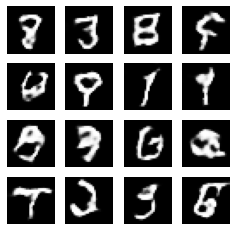

Time for epoch 38: 6.289660692214966s


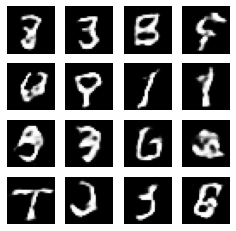

Time for epoch 39: 6.1376307010650635s


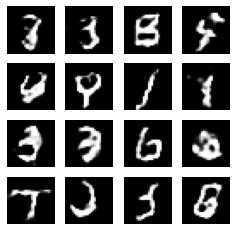

Time for epoch 40: 6.1445393562316895s


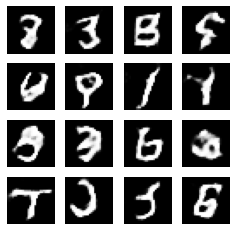

Time for epoch 41: 6.286182403564453s


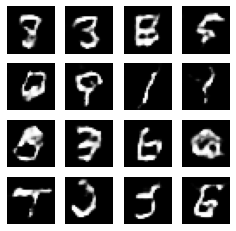

Time for epoch 42: 6.136887550354004s


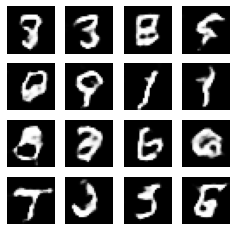

Time for epoch 43: 6.147669553756714s


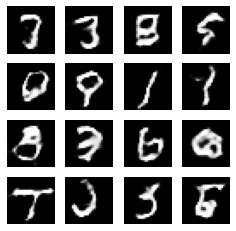

Time for epoch 44: 6.279449701309204s


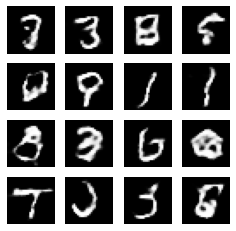

Time for epoch 45: 6.134006977081299s


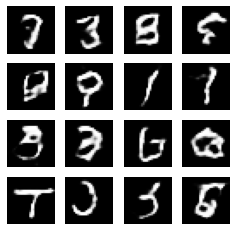

Time for epoch 46: 6.135408878326416s


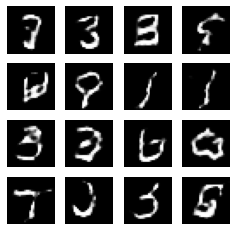

Time for epoch 47: 6.272608518600464s


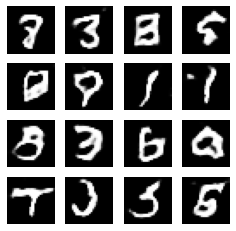

Time for epoch 48: 6.126145362854004s


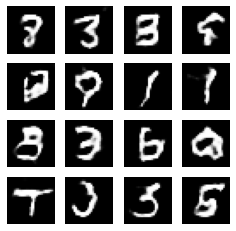

Time for epoch 49: 6.135805130004883s


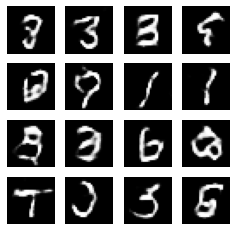

Time for epoch 50: 6.268967866897583s


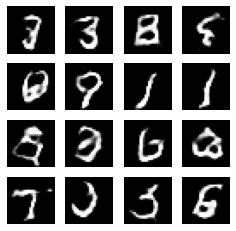

Time for epoch 51: 6.138057231903076s


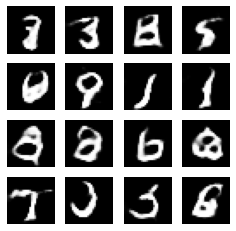

Time for epoch 52: 6.132440567016602s


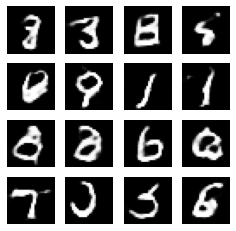

Time for epoch 53: 6.288512706756592s


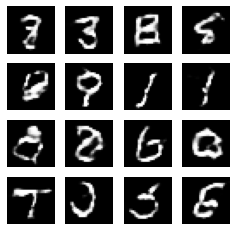

Time for epoch 54: 6.1335742473602295s


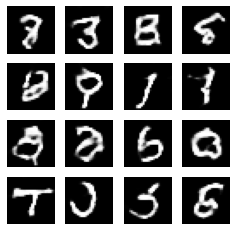

Time for epoch 55: 6.148320198059082s


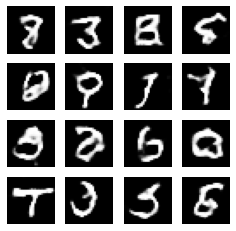

Time for epoch 56: 6.272779703140259s


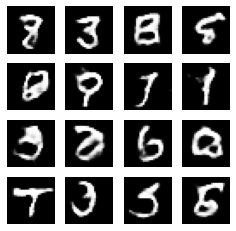

Time for epoch 57: 6.127827405929565s


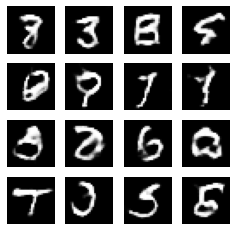

Time for epoch 58: 6.148139476776123s


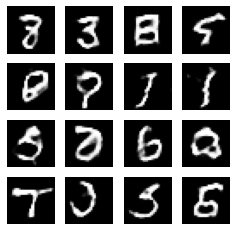

Time for epoch 59: 6.288008689880371s


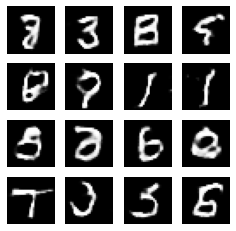

Time for epoch 60: 6.148264408111572s


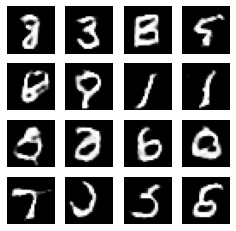

Time for epoch 61: 6.14585542678833s


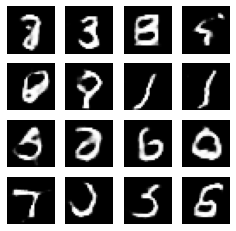

Time for epoch 62: 6.2681801319122314s


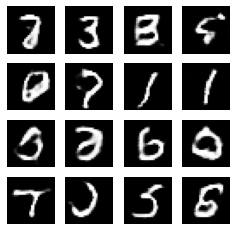

Time for epoch 63: 6.1206817626953125s


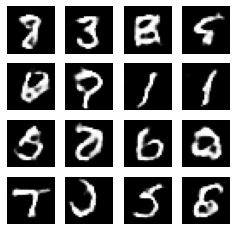

Time for epoch 64: 6.112478971481323s


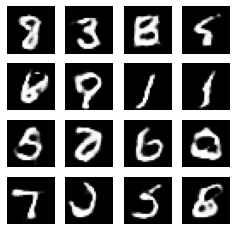

Time for epoch 65: 6.2554943561553955s


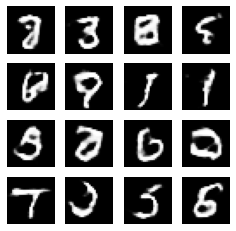

Time for epoch 66: 6.116410255432129s


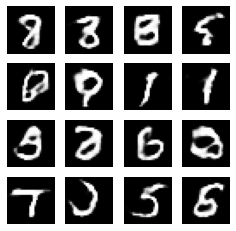

Time for epoch 67: 6.12300968170166s


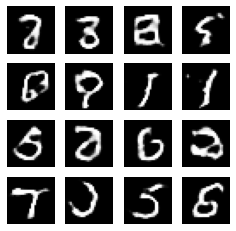

Time for epoch 68: 6.279413938522339s


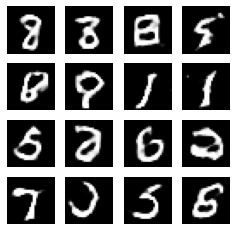

Time for epoch 69: 6.1265082359313965s


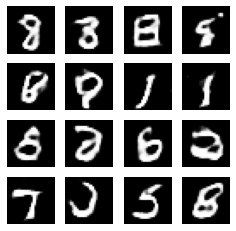

Time for epoch 70: 6.13323187828064s


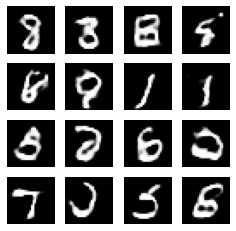

Time for epoch 71: 6.27170205116272s


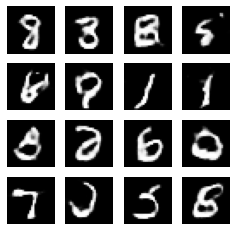

Time for epoch 72: 6.140673875808716s


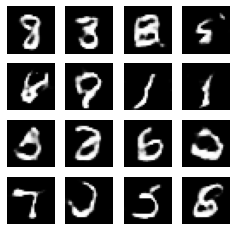

Time for epoch 73: 6.13141655921936s


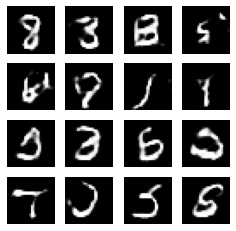

Time for epoch 74: 6.263089656829834s


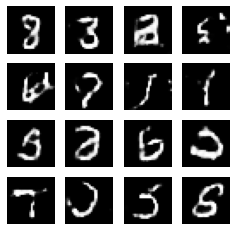

Time for epoch 75: 6.122473239898682s


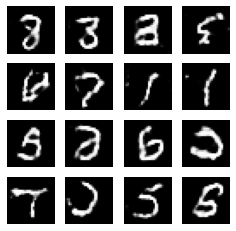

Time for epoch 76: 6.12169337272644s


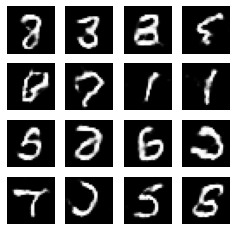

Time for epoch 77: 6.274064779281616s


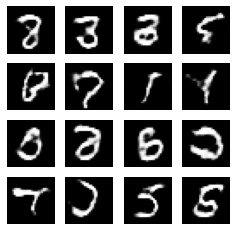

Time for epoch 78: 6.1243414878845215s


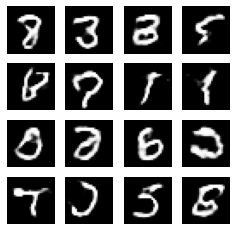

Time for epoch 79: 6.132569313049316s


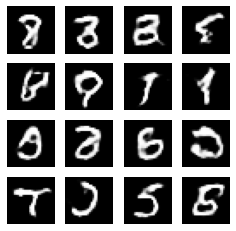

Time for epoch 80: 6.256916522979736s


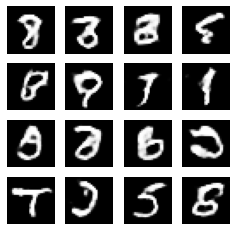

Time for epoch 81: 6.111670017242432s


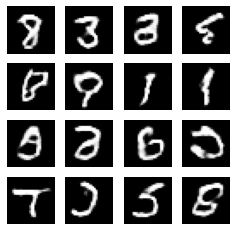

Time for epoch 82: 6.115955591201782s


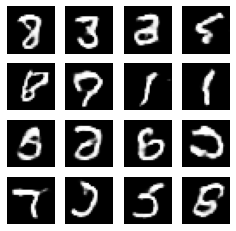

Time for epoch 83: 6.286278486251831s


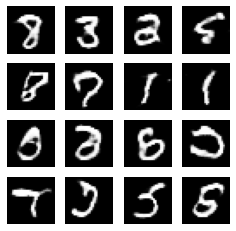

Time for epoch 84: 6.125875473022461s


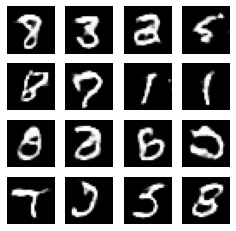

Time for epoch 85: 6.131339073181152s


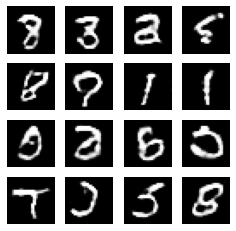

Time for epoch 86: 6.264071941375732s


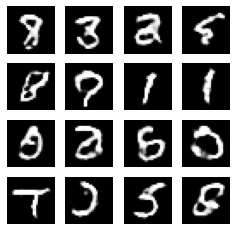

Time for epoch 87: 6.133687734603882s


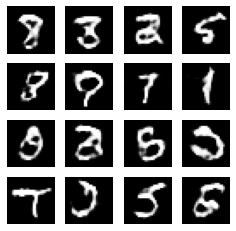

Time for epoch 88: 6.140297889709473s


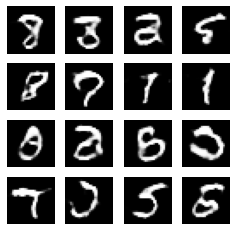

Time for epoch 89: 6.277493953704834s


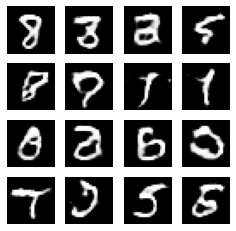

Time for epoch 90: 6.175623893737793s


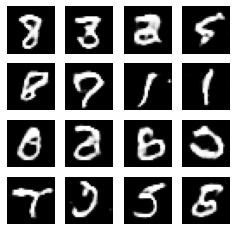

Time for epoch 91: 6.133638143539429s


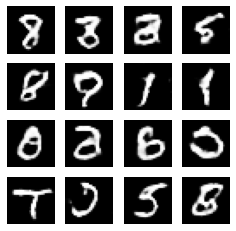

Time for epoch 92: 6.268754005432129s


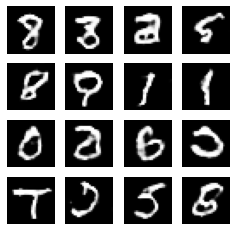

Time for epoch 93: 6.132155179977417s


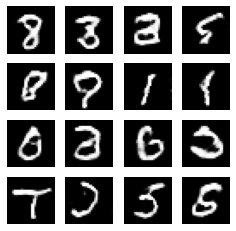

Time for epoch 94: 6.127218008041382s


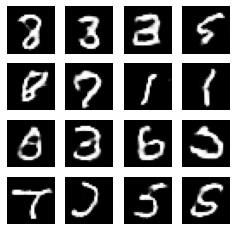

Time for epoch 95: 6.2611494064331055s


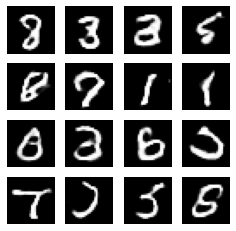

Time for epoch 96: 6.12431526184082s


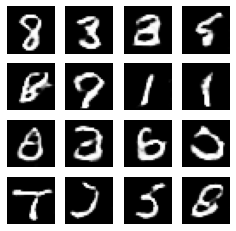

Time for epoch 97: 6.118403673171997s


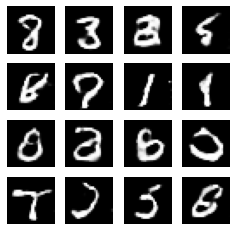

Time for epoch 98: 6.272079706192017s


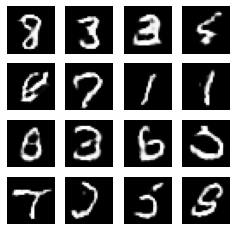

Time for epoch 99: 6.125385999679565s


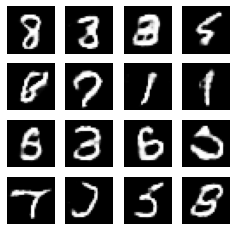

Time for epoch 100: 6.1352009773254395s


In [15]:
train(train_dataset, EPOCHS)

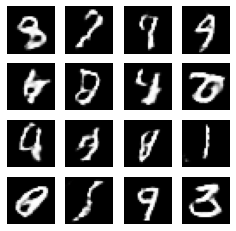

In [33]:
generate_images(generator, tf.random.normal([num_images, noise_dim]))